In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('mcdonalds.csv')

In [6]:
df.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [7]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [9]:
# df['yummy'].value_counts()
# df['convenient'].value_counts()
# df['spicy'].value_counts()
# df['fattening'].value_counts()
# df['greasy'].value_counts()
# df['fast'].value_counts()
# df['cheap'].value_counts()
# df['tasty'].value_counts()
# df['expensive'].value_counts()
# df['healthy'].value_counts()
# df['disgusting'].value_counts()
# df['Like'].value_counts()
# df['Gender'].value_counts()

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
def text_to_numbers(df):
        le = dict()
        for i in df.columns:
            if df[i].dtype not in ["float64", "bool", "int64"] and i not in ['Like','VisitFrequency']:
                le[i] = LabelEncoder()
                df[i] = le[i].fit_transform(df[i])
    
        return df, le

In [12]:
text_to_numbers(df)

(      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
 0         0           1      0          1       0     1      1      0   
 1         1           1      0          1       1     1      1      1   
 2         0           1      1          1       1     1      0      1   
 3         1           1      0          1       1     1      1      1   
 4         0           1      0          1       1     1      1      0   
 ...     ...         ...    ...        ...     ...   ...    ...    ...   
 1448      0           1      0          1       1     0      0      0   
 1449      1           1      0          1       0     0      1      1   
 1450      1           1      0          1       0     1      0      1   
 1451      1           1      0          0       0     1      1      1   
 1452      0           1      0          1       1     0      0      0   
 
       expensive  healthy  disgusting          Like  Age      VisitFrequency  \
 0             1        0     

In [13]:
df['Like'].unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [14]:
df['Like']=df['Like'].apply(lambda x: x.replace('I love it!',''))
df['Like']=df['Like'].apply(lambda x: x.replace('I hate it!',''))
df['Like']=df['Like'].astype(int)

In [15]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,0.777013,44.604955,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,3.116842,14.221178,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,18.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,33.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,45.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,57.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,71.000000,1.000000


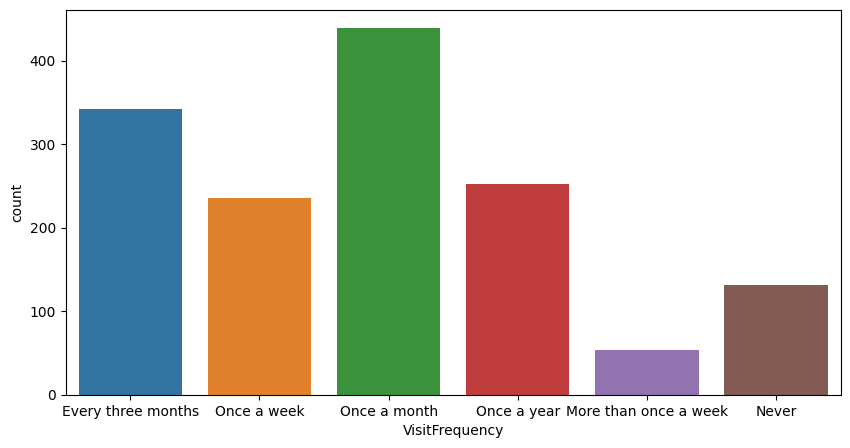

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['VisitFrequency'])
plt.show()

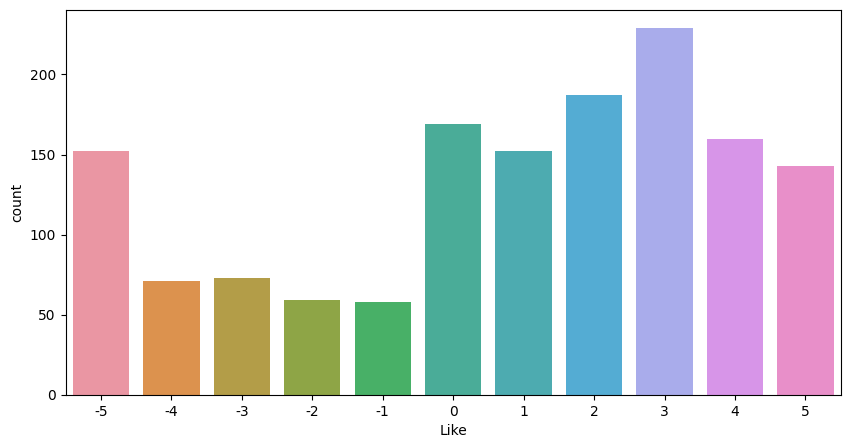

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Like'])
plt.show()

In [18]:
df.isnull().sum().sort_values(ascending=False)

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

<Axes: >

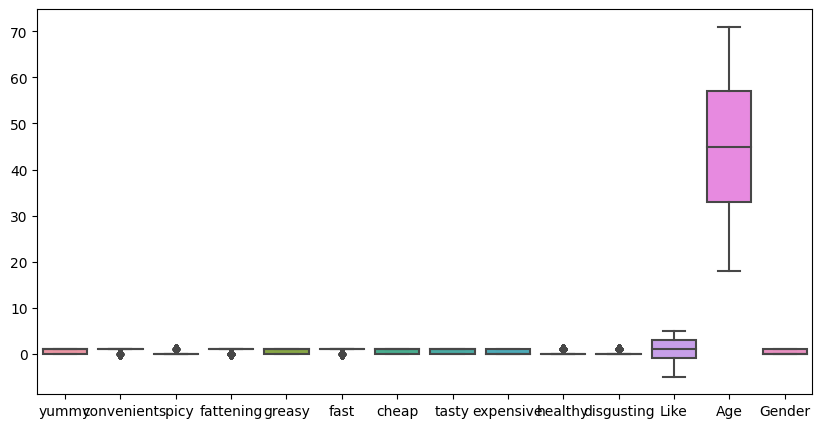

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(df)

In [20]:
df['VisitFrequency']=le.fit_transform(df['VisitFrequency'])

In [21]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1


In [22]:
age_bin=[0,18,30,40,50,60,100]
age_labels = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-100']

df['Age_Grp']=pd.cut(df['Age'],bins=age_bin,labels=age_labels)

In [23]:
y=df['Age_Grp'].value_counts()
y

Age_Grp
50-59     351
30-39     299
18-29     286
40-49     275
60-100    226
0-17       16
Name: count, dtype: int64

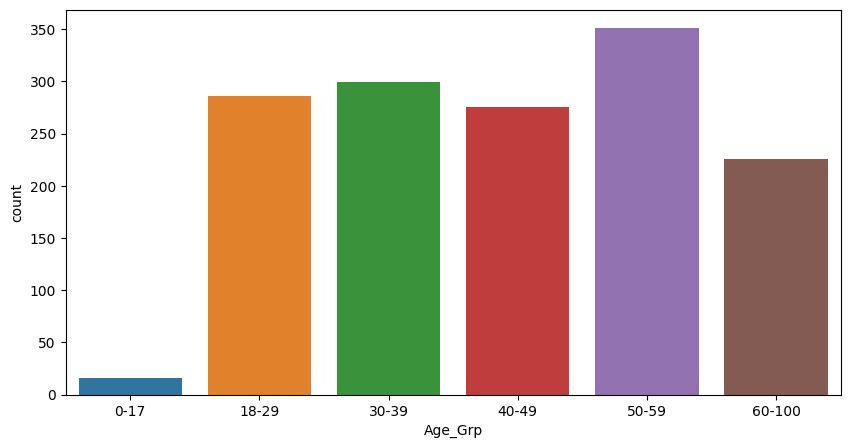

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Age_Grp'])
plt.show()

In [25]:
df.shape

(1453, 16)

In [26]:
# ndf=pd.get_dummies(df,columns=['Age_Grp'])

In [38]:
X=df.drop(['Age_Grp'],axis=1)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,5,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,4,0
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,3,0
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,0,1


In [39]:
from sklearn.cluster import KMeans
sse = [] 
for k in range(1,10):
    km = KMeans(n_clusters=k,init="k-means++", random_state=2)
    km.fit(X)
    sse.append(km.inertia_)

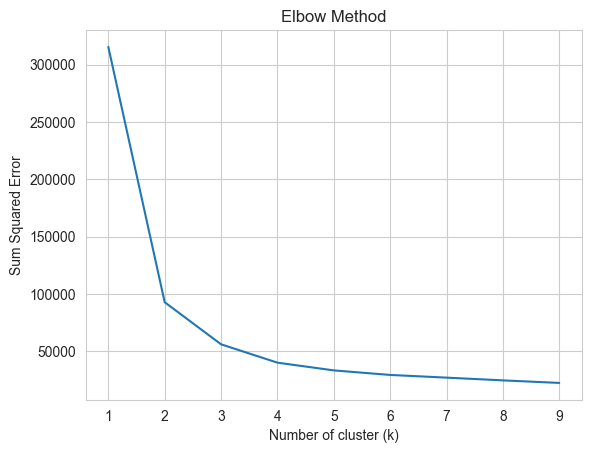

In [40]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,10), y=sse)
g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')
 
plt.show()

In [51]:
#There is elbow like situation between 2 and 4 ,so i am taking 3 as number of cluster
kmeans = KMeans(n_clusters = 3,init="k-means++", random_state = 2)
kmeans.fit(X)
pred = kmeans.fit_predict(X)

In [52]:
kmeans.cluster_centers_

array([[27.33183857,  0.46188341,  0.75112108,  0.92600897],
       [59.69104205,  0.43327239,  0.42413163,  0.89031079],
       [43.41304348,  0.4826087 ,  0.51304348,  0.91086957]])

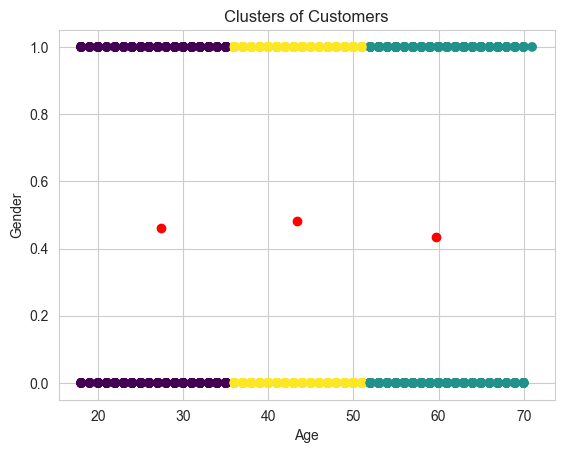

In [53]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1],c=pred, cmap="viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="red")
plt.title("Clusters of Customers")
plt.xlabel("Age")
plt.ylabel("Gender")
plt.show()